In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [15]:
# Upload do arquivo
from google.colab import files
arq = files.upload()

Saving Data_Science_Fields_Salary_Categorization.xlsx to Data_Science_Fields_Salary_Categorization.xlsx


In [16]:
# Criando no DataFrame
df = pd.read_excel("Data_Science_Fields_Salary_Categorization.xlsx")

In [17]:
df.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,20688070,JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,1591390,HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50


In [18]:
df.shape

(607, 10)

In [19]:
df.dtypes

Unnamed: 0               int64
Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees         int64
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

In [25]:
df = df.rename(columns={"Working_Year": "Ano", "Designation": "Designação", "Experience": "Experiência", "Employment_Status": "Status", "Salary_In_Rupees": "Salário_em_Rupias", "Employee_Location": "Local_Empregado", "Company_Location": "Local_Empresa", "Company_Size": "Tamanho_Empresa", "Remote_Working_Ratio": "Proporcao_Trabalho_Remoto"})

In [26]:
df.head(1)

,Unnamed: 0,Ano,Designação,Experiência,Status,Salário_em_Rupias,Local_Empregado,Local_Empresa,Tamanho_Empresa,Proporcao_Trabalho_Remoto
0,1,2020,Data Scientist,MI,FT,6352272,DE,DE,L,0


In [83]:
# Maior Salário
df["Salário_em_Rupias"].max()

47741700

In [85]:
# Menor Salário
round(df["Salário_em_Rupias"].min(), 2)

227489

In [30]:
# Média Salarial
df["Salário_em_Rupias"].mean()

8935485.429983525

In [32]:
# Total pago em salários
round(df["Salário_em_Rupias"].sum(), 2)

5423839656

In [35]:
# Total de salários pagos por ano
df.groupby("Ano")["Salário_em_Rupias"].sum()

Ano
2020     548913065
2021    1724133664
2022    3150792927
Name: Salário_em_Rupias, dtype: int64

Text(0, 0.5, 'Ano')

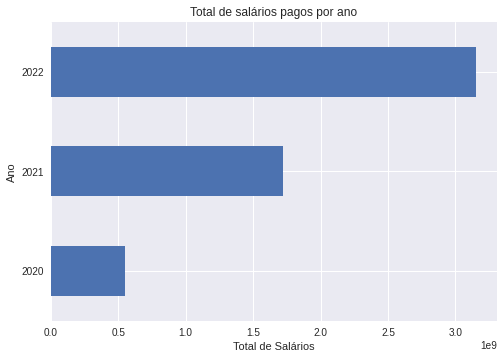

In [43]:
# Gráfico do Total de salários pagos por ano
df.groupby("Ano")["Salário_em_Rupias"].sum().sort_values(ascending=True).plot.barh(title="Total de salários pagos por ano")
plt.xlabel("Total de Salários")
plt.ylabel("Ano")

Text(0, 0.5, 'Salário')

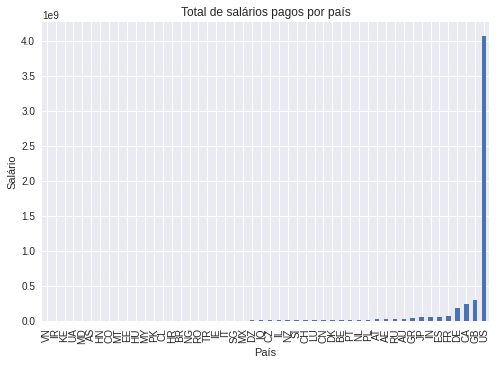

In [71]:
# Gráfico do Total de salários pagos por ano
df.groupby("Local_Empresa")["Salário_em_Rupias"].sum().sort_values(ascending=True).plot.bar(title="Total de salários pagos por país") ;
plt.xlabel("País")
plt.ylabel("Salário")

In [50]:
# Empresas com trabalho remoto
df[df["Proporcao_Trabalho_Remoto"] > 0]

,Unnamed: 0,Ano,Designação,Experiência,Status,Salário_em_Rupias,Local_Empregado,Local_Empresa,Tamanho_Empresa,Proporcao_Trabalho_Remoto
2,3,2020,Big Data Engineer,SE,FT,8674985,GB,GB,M,50
4,5,2020,Machine Learning Engineer,SE,FT,11935425,US,US,L,50
5,6,2020,Data Analyst,EN,FT,5729004,US,US,L,100
6,7,2020,Lead Data Scientist,SE,FT,15118205,US,US,S,100
7,8,2020,Data Scientist,MI,FT,2843416,HU,HU,L,50
...,...,...,...,...,...,...,...,...,...,...
599,600,2022,Data Scientist,MI,FT,10344035,US,US,M,100
602,603,2022,Data Engineer,SE,FT,12253703,US,US,M,100
603,604,2022,Data Engineer,SE,FT,10025757,US,US,M,100
605,606,2022,Data Analyst,SE,FT,11935425,US,US,M,100


In [87]:
# Soma do total de salários pagos por Designação em Reais
df.groupby("Designação")["Salário_em_Rupias"].sum().sort_values(ascending=False).mul(0.065)                                     

Designação
Data Scientist                                    80,015,558.87
Data Engineer                                     76,958,069.44
Data Analyst                                      46,603,121.24
Machine Learning Engineer                         22,240,120.24
Data Architect                                    10,119,636.67
Data Science Manager                               9,826,533.41
Research Scientist                                 9,021,612.21
Principal Data Scientist                           7,792,663.32
Director of Data Science                           7,062,483.03
Machine Learning Scientist                         6,554,497.88
Principal Data Engineer                            5,094,437.27
Data Analytics Manager                             4,602,785.27
Applied Data Scientist                             4,542,453.76
Lead Data Engineer                                 4,335,945.38
Head of Data                                       4,141,818.92
ML Engineer                  

In [56]:
# Convertendo a notação científica
pd.options.display.float_format = '{:20,.2f}'.format

In [89]:
# Média salarial por Experiência
df.groupby("Experiência")["Salário_em_Rupias"].mean().mul(0.0065)  

Experiência
EN              31,882.03
EX             103,125.91
MI              45,511.71
SE              71,693.11
Name: Salário_em_Rupias, dtype: float64

In [59]:
# Média salarial por Tamanho da Empresa
df.groupby("Tamanho_Empresa")["Salário_em_Rupias"].mean()

Tamanho_Empresa
L           9,488,105.59
M           9,302,109.57
S           6,177,193.12
Name: Salário_em_Rupias, dtype: float64